# Iris flower classification

Here is a brief description of the columns in your dataset:

1. **Sepal Length**: The length of the sepal in centimeters. This is a continuous numerical feature that ranges from 4.3 cm to 7.9 cm.

2. **Sepal Width**: The width of the sepal in centimeters. This continuous numerical feature ranges from 2.0 cm to 4.4 cm.

3. **Petal Length**: The length of the petal in centimeters. This is another continuous numerical feature, ranging from 1.0 cm to 6.9 cm.

4. **Petal Width**: The width of the petal in centimeters. This continuous numerical feature ranges from 0.1 cm to 2.5 cm.

5. **Species**: The type of iris plant, categorized into three classes: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*. This is a categorical feature with three unique values.

In [1]:
#Here we are importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring data in detail

In [2]:
#Reading and printing the dataframe
df = pd.read_csv("C:/CodSoft/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# looking into data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# looking into statistical information of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Returns the number of missing values in dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# looking unique values in species column
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# applying one hot encoding to the species column
df['species'] = df['species'].map({'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2})

## Visualization of data

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

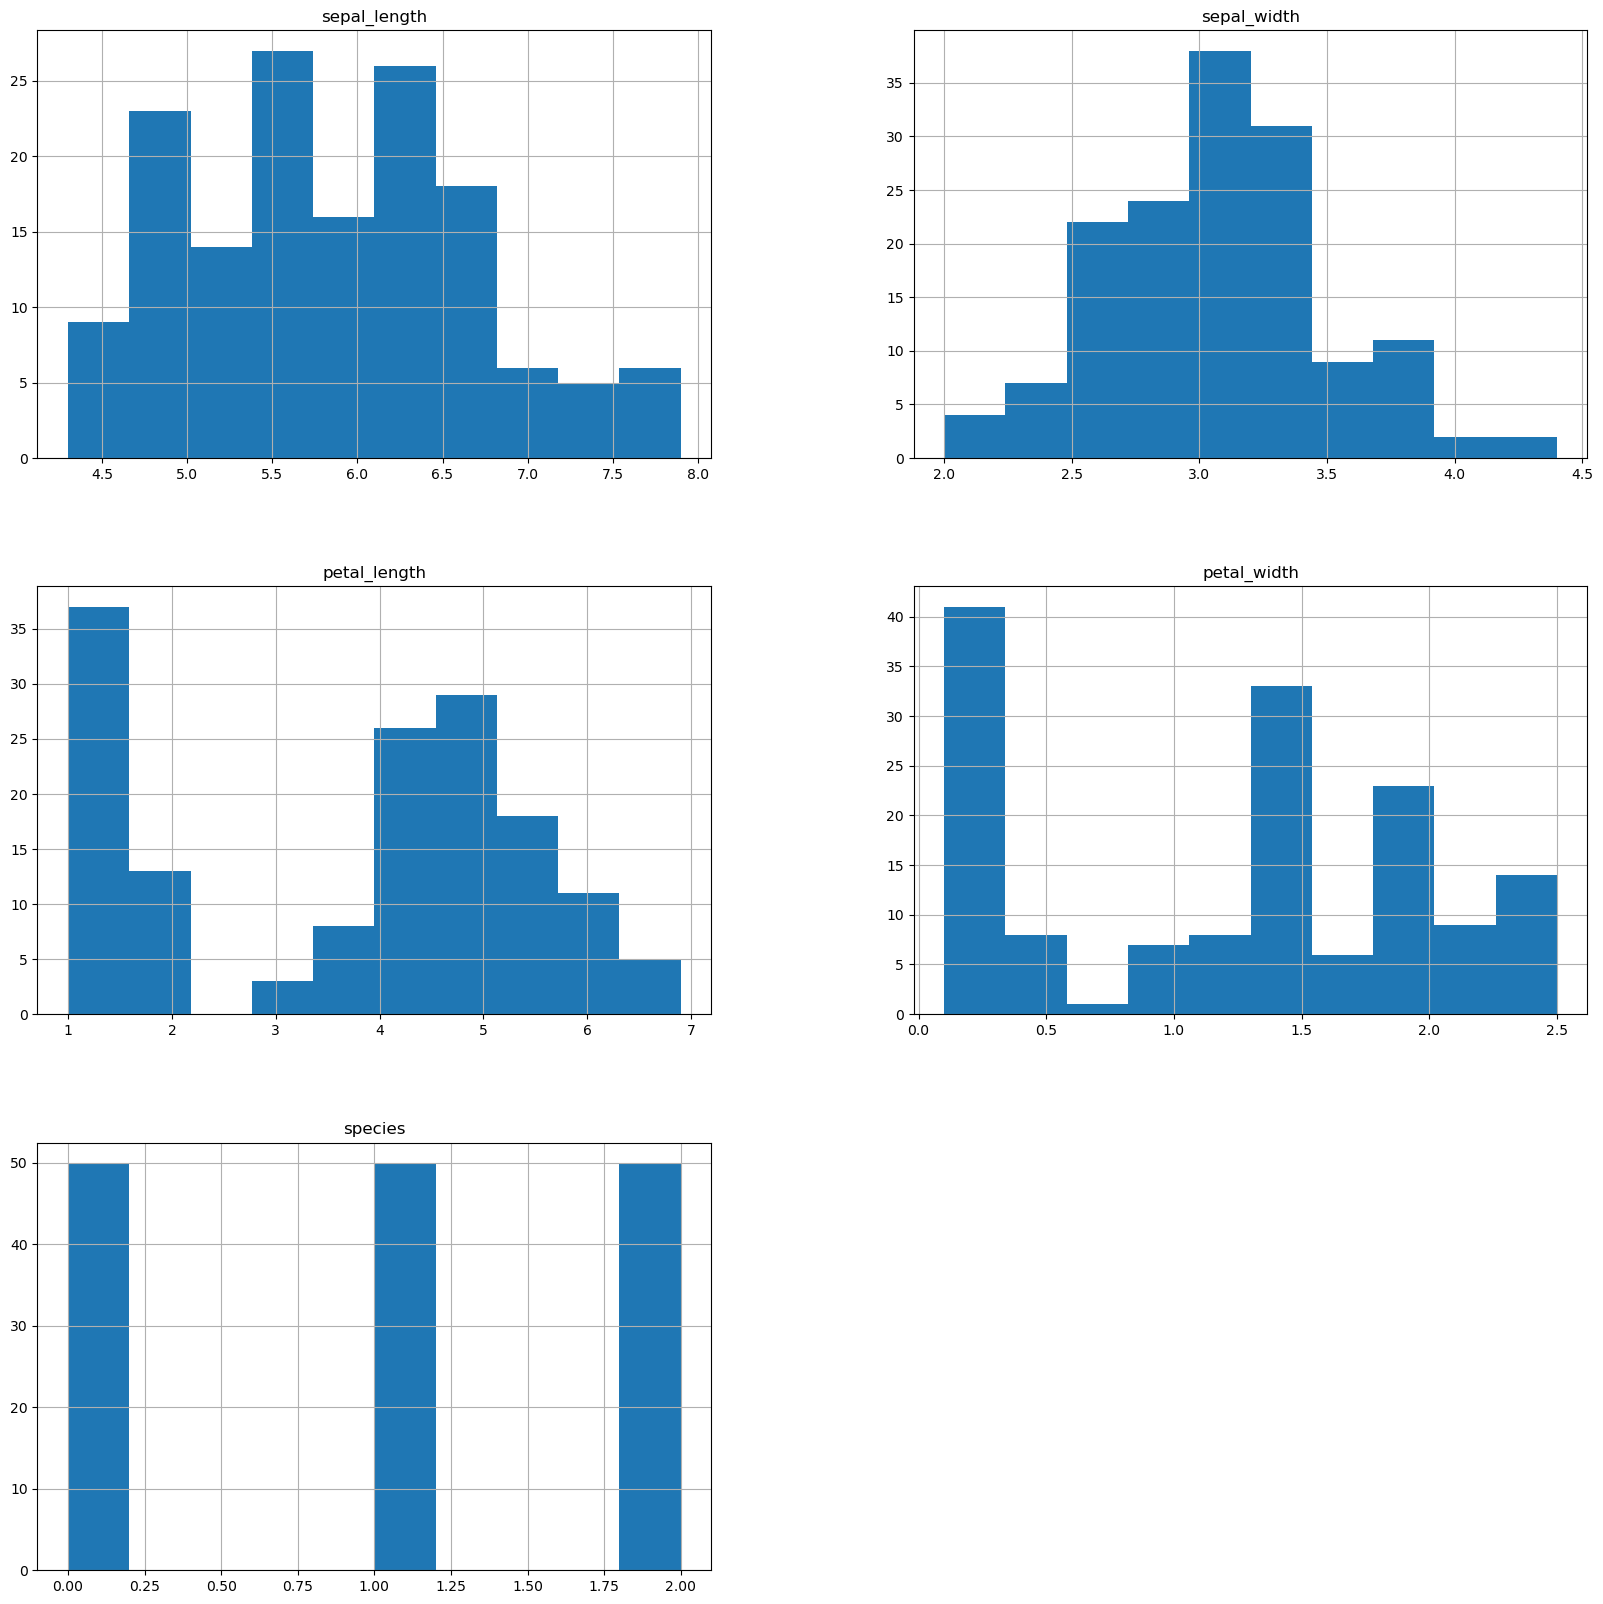

In [8]:
#Plots a histogram and giving the size of the figure width=20 and height=20
df.hist(figsize = (20,20))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15908\1157565169.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist(bins=20, figsize=(14, 6), layout=(2, 2), color='skyblue', edgecolor='black', ax=axes[1, 0])


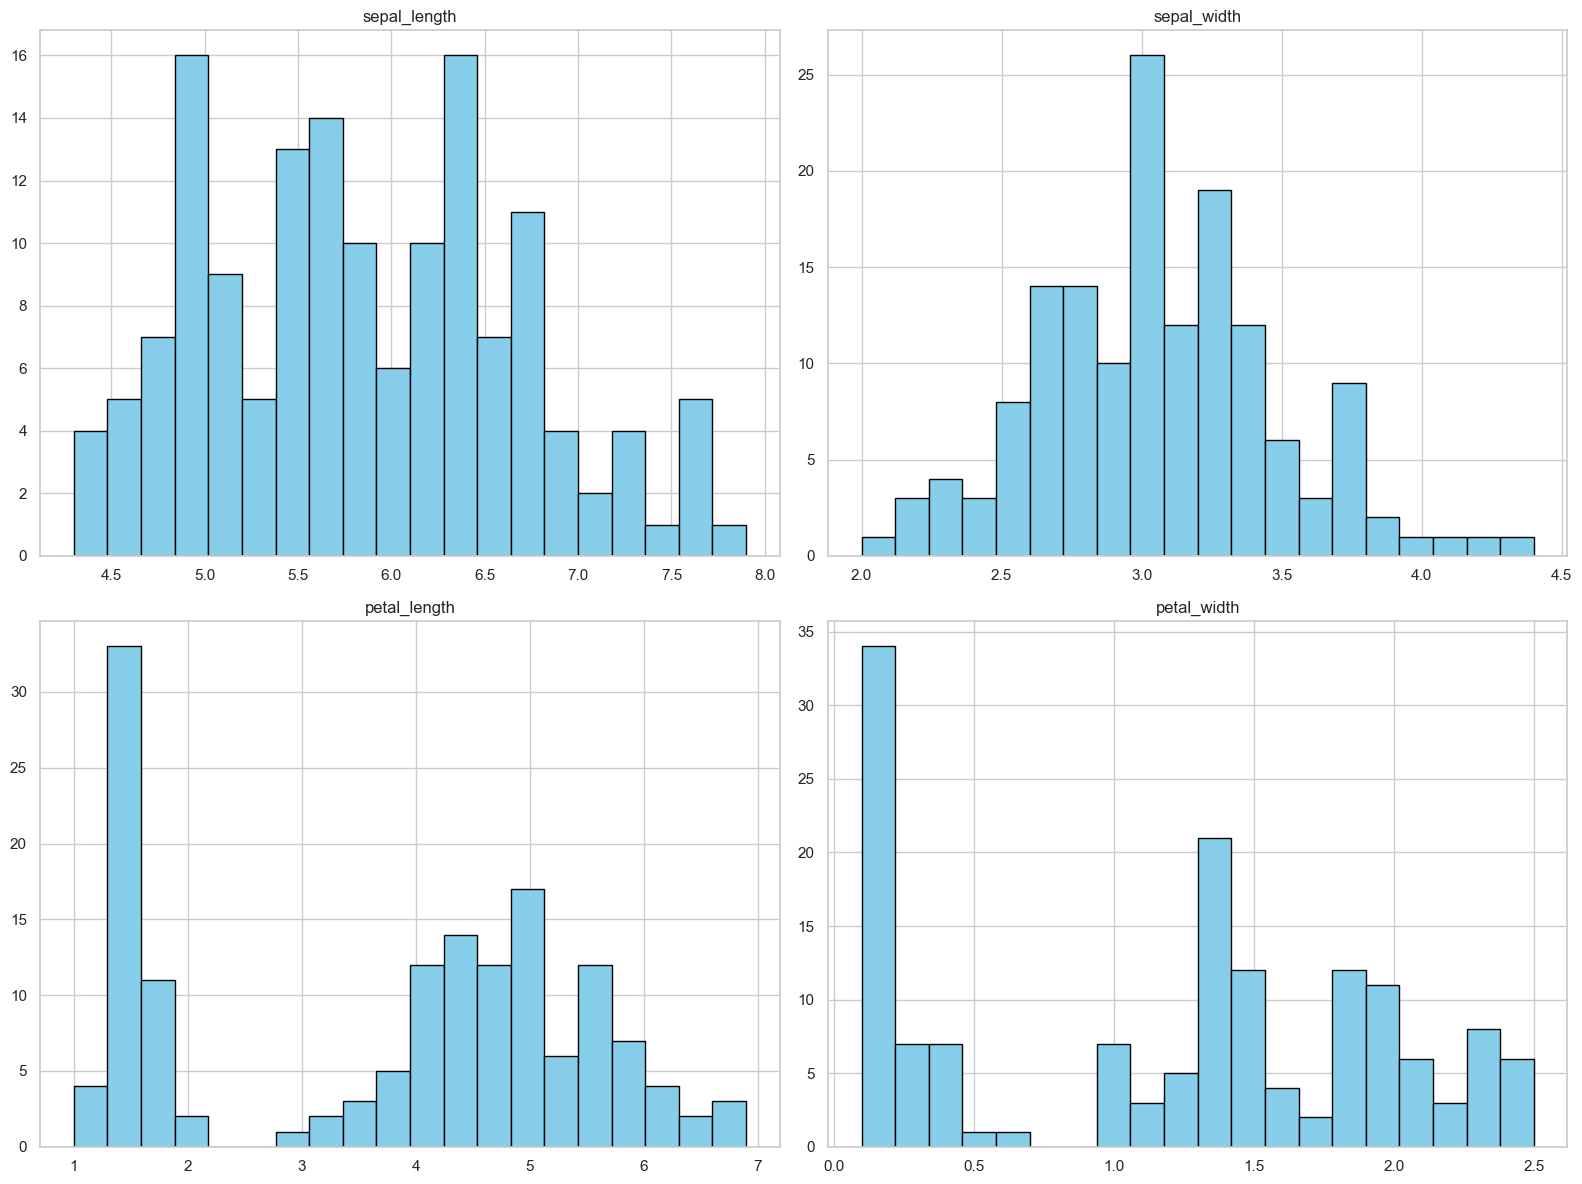

In [9]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograms
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].hist(bins=20, figsize=(14, 6), layout=(2, 2), color='skyblue', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Histograms')

plt.tight_layout()
plt.show()


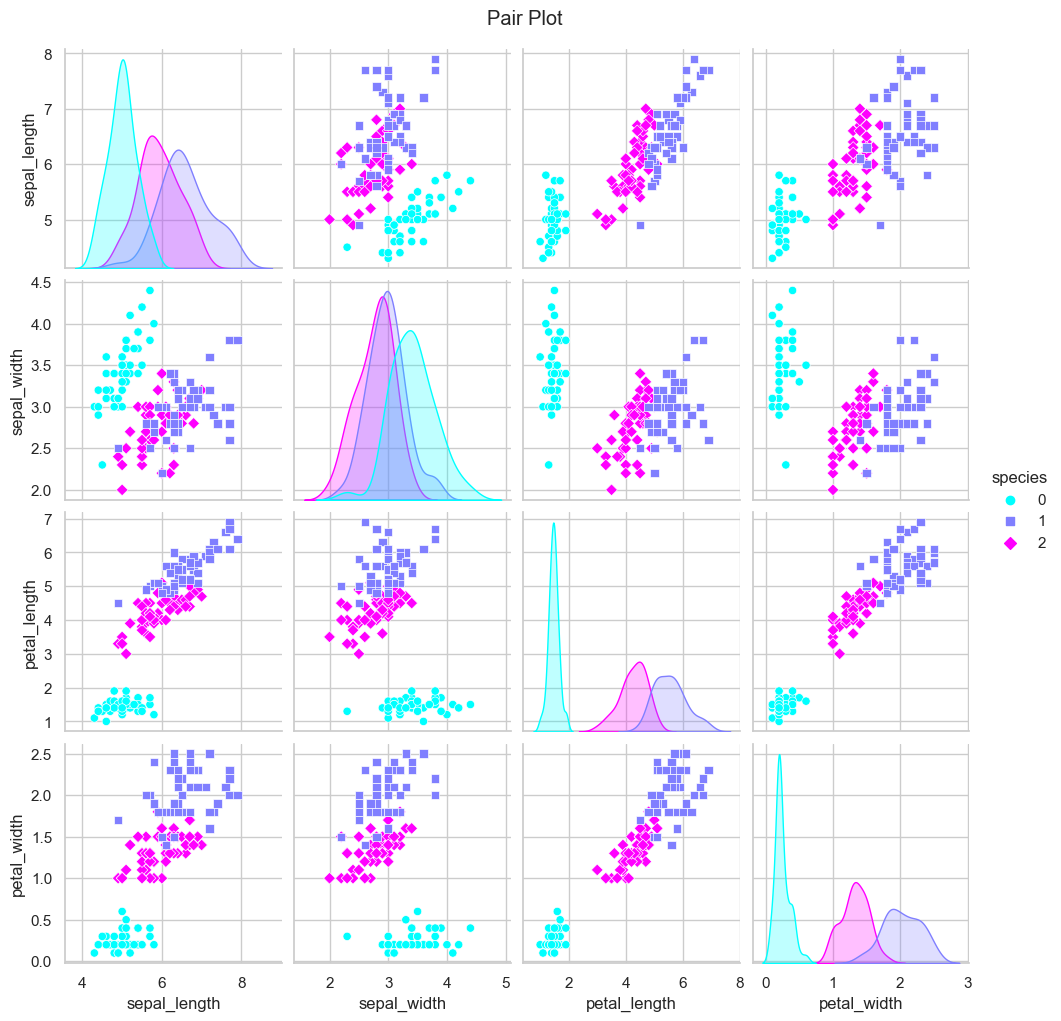

In [10]:
# Pair plot
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="cool")
plt.suptitle('Pair Plot', y=1.02)
plt.show()

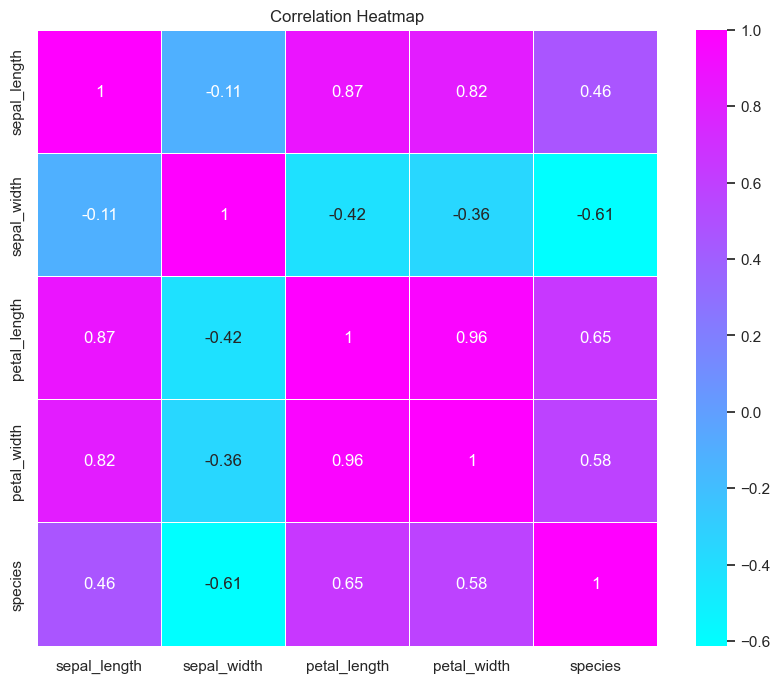

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

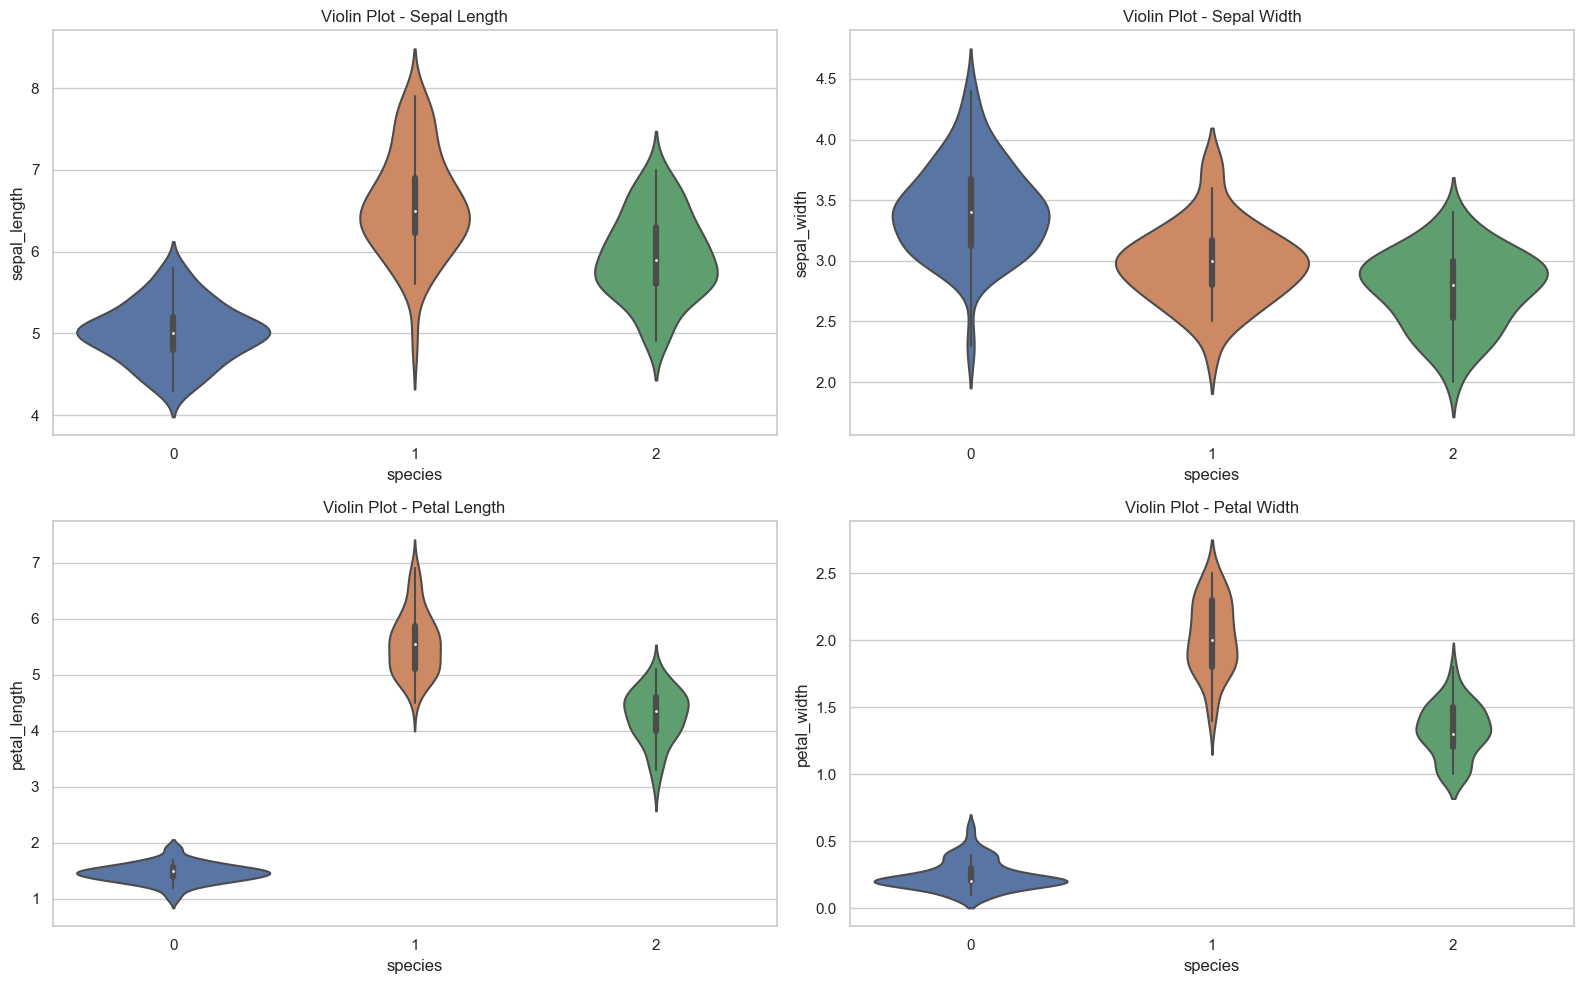

In [12]:
# Violin plots
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Violin Plot - Sepal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title('Violin Plot - Sepal Width')

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=df)
plt.title('Violin Plot - Petal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Violin Plot - Petal Width')

plt.tight_layout()
plt.show()


In [13]:
# looking column names
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Train test splitting

In [14]:
# copying data such that original is not affected and selecting columns that are relevent
data = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']].copy(deep= True)

In [15]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [16]:
# gives frequency of unique values in a column/s to find if data is balanced or imbalanced
data['species'].value_counts()

0    50
2    50
1    50
Name: species, dtype: int64

In [17]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
# importing classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
# KNeighbhors algorithm where we have kept value of k in a loop to get an optimum value with least misclassified data
missclassified=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kpred = knn.predict(x_test)
    missclassified.append((y_test != kpred).sum())
print(missclassified)

[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
kcm = confusion_matrix(y_test,kpred)
kacc = accuracy_score(y_test,kpred)
print(f'The confusion matrix is:\n{kcm}\nThe accuracy is: {round((kacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [22]:
# Random Forest algorithm
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rpred = rfc.predict(x_test)
rcm = confusion_matrix(y_test,rpred)
racc = accuracy_score(y_test,rpred)
print(f'The confusion matrix is:\n{rcm}\nThe accuracy is: {round((racc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%


In [23]:
# Decision Tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred = dtc.predict(x_test)
dcm = confusion_matrix(y_test,dpred)
dacc = accuracy_score(y_test,dpred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {round((dacc*100), 2)}%')

The confusion matrix is:
[[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
The accuracy is: 97.78%
